# Assessing Data Quality

### Basic information

In [2]:
import pandas as pd
dt_cyclism = pd.read_csv('../dataset/races.csv')
dt_cyclism.head()

,_url,name,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,date,position,cyclist,cyclist_age,is_tarmac,is_cobbled,is_gravel,cyclist_team,delta
0,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,0,sean-kelly,22.0,True,False,False,vini-ricordi-pinarello-sidermec-1986,0.0
1,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,1,gerrie-knetemann,27.0,True,False,False,norway-1987,0.0
2,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,2,rene-bittinger,24.0,True,False,False,NaN,0.0
3,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,3,joseph-bruyere,30.0,True,False,False,navigare-blue-storm-1993,0.0
4,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,4,sven-ake-nilsson,27.0,True,False,False,spain-1991,0.0


In [3]:
dt_cyclism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589865 entries, 0 to 589864
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   _url                 589865 non-null  object 
 1   name                 589865 non-null  object 
 2   points               589388 non-null  float64
 3   uci_points           251086 non-null  float64
 4   length               589865 non-null  float64
 5   climb_total          442820 non-null  float64
 6   profile              441671 non-null  float64
 7   startlist_quality    589865 non-null  int64  
 8   average_temperature  29933 non-null   float64
 9   date                 589865 non-null  object 
 10  position             589865 non-null  int64  
 11  cyclist              589865 non-null  object 
 12  cyclist_age          589752 non-null  float64
 13  is_tarmac            589865 non-null  bool   
 14  is_cobbled           589865 non-null  bool   
 15  is_gravel        

looks like delta is not always recorded, lets see how many time it should be substituted with nan

In [4]:
tot_unsigned_times = dt_cyclism[(dt_cyclism['position'] != 0) & (dt_cyclism['delta'] == 0)].shape[0]
print('Total of times delta was not recorded', tot_unsigned_times)
print(f'Percentage of times delta was not recorded: {tot_unsigned_times / dt_cyclism.shape[0] * 100:.2f}%')

Total of times delta was not recorded 115265
Percentage of times delta was not recorded: 19.54%


let's see if similar problems there are with the type of terrain (i.e. the terrain is false for all 3 its possible values)

while we are at it, let us also look if there are races with mixed terrain. (Looks like they are not registered, probably only the principal terrain is set)

In [5]:
tot_unsigned_terrain = dt_cyclism[
    (dt_cyclism['is_tarmac'] == False) & 
    (dt_cyclism['is_cobbled'] == False) &
    (dt_cyclism['is_gravel'] == False)
    ].shape[0]
print('Total of times terrain was not recorded', tot_unsigned_terrain)
print(f'Percentage of times terrain was not recorded: {tot_unsigned_terrain / dt_cyclism.shape[0] * 100:.2f}%')

tot_mixed_terrain = dt_cyclism[
    (
        (dt_cyclism['is_gravel'] == True) +
        (dt_cyclism['is_tarmac'] == True) +
        (dt_cyclism['is_cobbled'] == True)
    ) > 1
    ].shape[0]
print('Total of times mixed terrain was recorded', tot_mixed_terrain)
print(f'Percentage of times mixed terrain was recorded: {tot_mixed_terrain / dt_cyclism.shape[0] * 100:.2f}%')

Total of times terrain was not recorded 53823
Percentage of times terrain was not recorded: 9.12%
Total of times mixed terrain was recorded 0
Percentage of times mixed terrain was recorded: 0.00%


we have a problem: is my code wrong or is the dataset uncomplete? I'm a good programmer... it must be the dataset...
Probably there are no terrain registered as gravel or tarmac...

we'll try directly to see if there are columns that contain only 1 value.

We're "luky" only the columns 'is_tarmac' and 'is_gravel' present this problem

In [6]:

for col in dt_cyclism.columns:
    if dt_cyclism[col].nunique() < 3:
        print(dt_cyclism[col].value_counts())
        print("Null Values Percentage:")
        print((dt_cyclism[col].isna().sum()/ len(dt_cyclism)) * 100)
        print("")

is_tarmac
True     536042
False     53823
Name: count, dtype: int64
Null Values Percentage:
0.0

is_cobbled
False    589865
Name: count, dtype: int64
Null Values Percentage:
0.0

is_gravel
False    589865
Name: count, dtype: int64
Null Values Percentage:
0.0



### Race analysis

Now we will analyze the distributions of different races

In [7]:
dt_cyclism_race = dt_cyclism.drop_duplicates(subset='_url', keep='first')
print(f"Number of unique races: {dt_cyclism_race.shape[0]}")
print(f'Number of null names is {dt_cyclism['_url'].isna().sum()}')

Number of unique races: 5281
Number of null names is 0


In [8]:
dt_cyclism_race = dt_cyclism_race.drop(columns=['cyclist', 'cyclist_age', 'position', 'delta', 'cyclist_team'])
dt_cyclism_race.head()

,_url,name,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,date,is_tarmac,is_cobbled,is_gravel
0,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,True,False,False
106,vuelta-a-espana/2016/stage-14,Vuelta a España,80.0,100.0,196000.0,5575.0,5.0,821,NaN,2016-09-03 05:43:24,True,False,False
271,tour-de-france/2019/stage-21,Tour de France,100.0,120.0,128000.0,781.0,1.0,1699,NaN,2019-07-28 03:04:08,True,False,False
426,volta-a-catalunya/1999/prologue,Volta Ciclista a Catalunya,50.0,NaN,8100.0,NaN,NaN,804,NaN,1999-06-17 00:10:12,True,False,False
545,tour-de-france/2022/stage-9,Tour de France,100.0,120.0,192900.0,3743.0,3.0,1551,24.0,2022-07-10 04:46:39,True,False,False


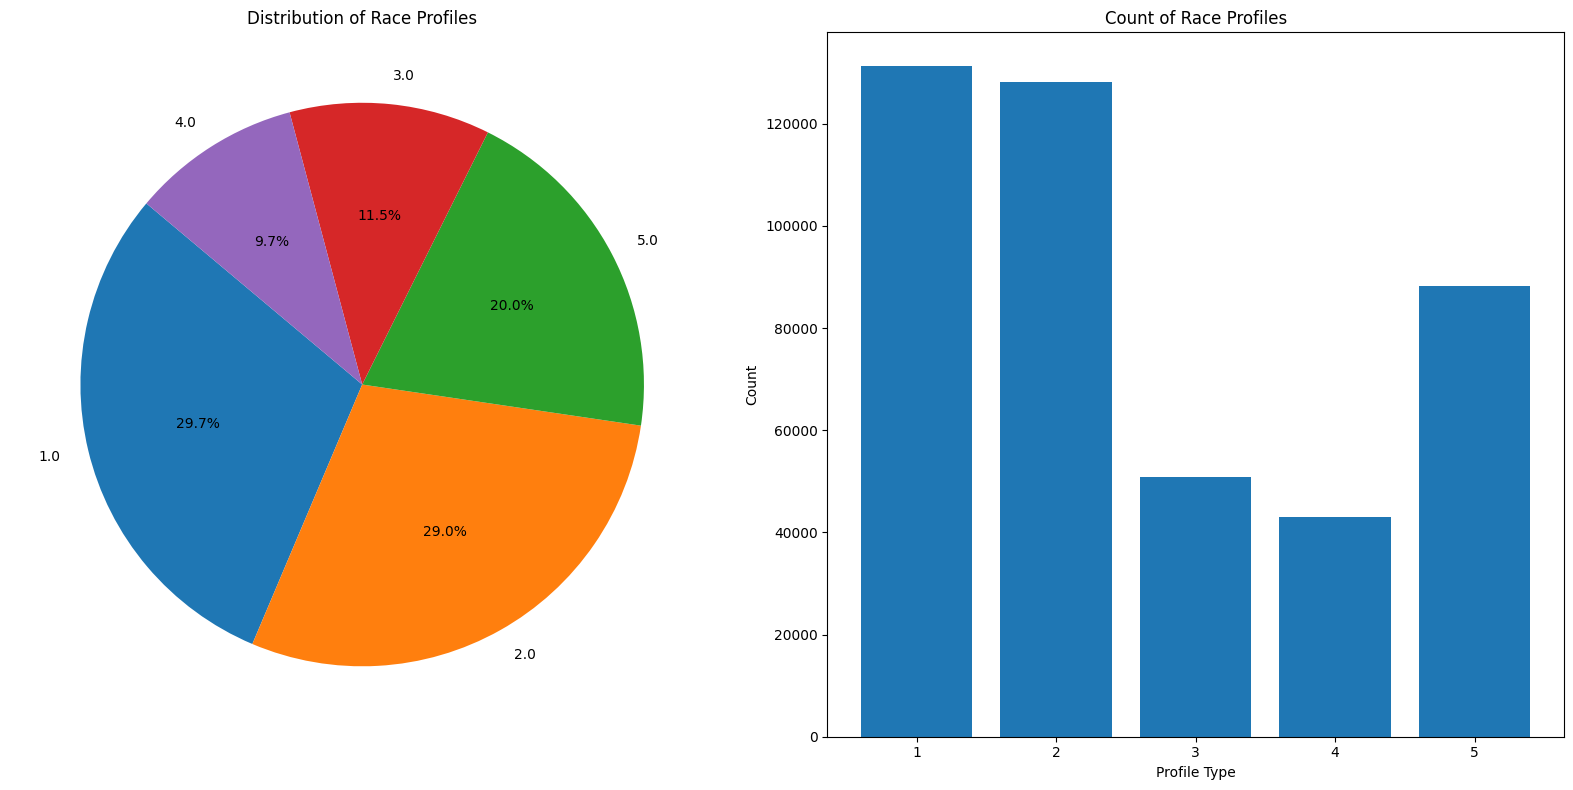

In [11]:
import matplotlib.pyplot as plt

# Drop rows with NaN values in 'profile' column
dt_cyclism_profile = dt_cyclism.dropna(subset=['profile'])

# Count the occurrences of each profile type
profile_counts = dt_cyclism_profile['profile'].value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Plot the pie chart
axs[0].pie(profile_counts, labels=profile_counts.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Race Profiles')

# Plot the bar chart
axs[1].bar(profile_counts.index, profile_counts.values)
axs[1].set_title('Count of Race Profiles')
axs[1].set_xlabel('Profile Type')
axs[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

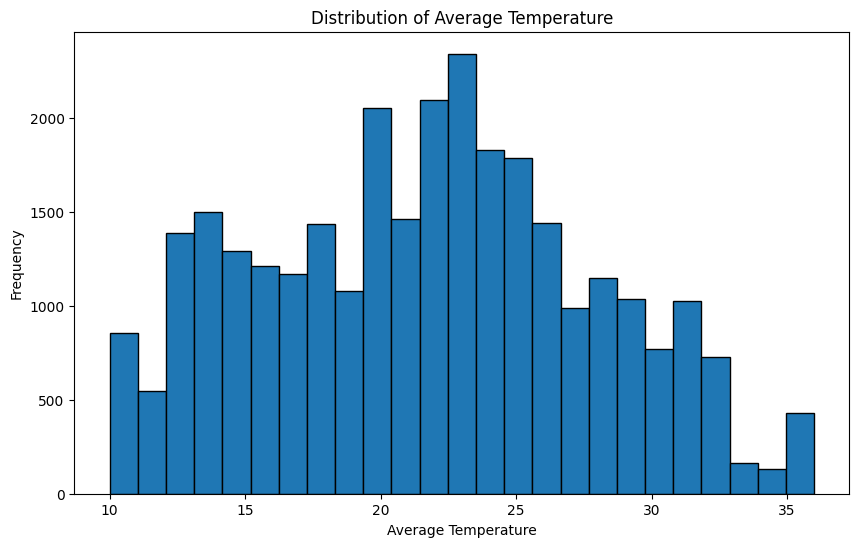

In [13]:
# Drop rows with NaN values in 'average_temperature' column
dt_cyclism_temp = dt_cyclism.dropna(subset=['average_temperature'])

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(dt_cyclism_temp['average_temperature'], bins=25, edgecolor='black')
plt.title('Distribution of Average Temperature')
plt.xlabel('Average Temperature')
plt.ylabel('Frequency')
plt.show()

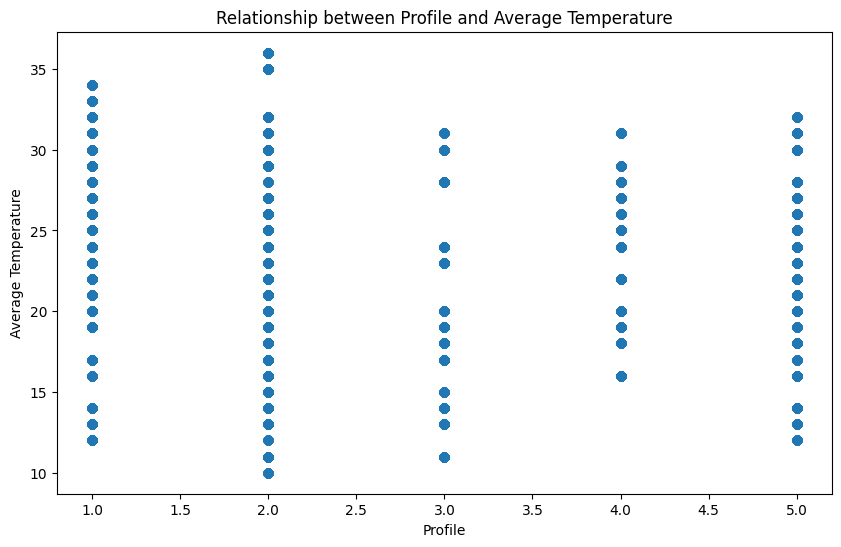

In [14]:
# Drop rows with NaN values in 'profile' and 'average_temperature' columns
dt_cyclism_profile_temp = dt_cyclism.dropna(subset=['profile', 'average_temperature'])

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(dt_cyclism_profile_temp['profile'], dt_cyclism_profile_temp['average_temperature'], alpha=0.5)
plt.title('Relationship between Profile and Average Temperature')
plt.xlabel('Profile')
plt.ylabel('Average Temperature')
plt.show()